# Visual Computing Lab 1

In this lab we will understand how to implement a simple neural network architecture with one hidden layer.

To make data loading simple, we will use the torchvision package created as part of PyTorch which has data loaders for standard datasets such as ImageNet, CIFAR10, MNIST.

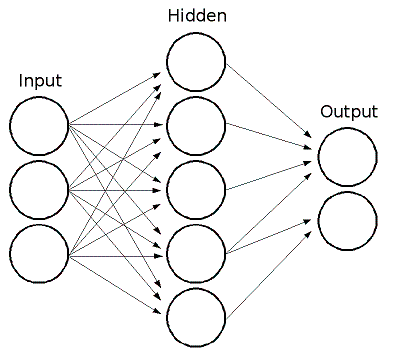

## Import all the required packages

In [1]:
#a Tensor library with GPU support
import torch

#Datasets, Transforms and Models specific to Computer Vision
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms

#differentiation library that supports all differentiable Tensor operations in torch
from torch.autograd import Variable

#a neural networks library integrated with autograd functionality
import torch.nn as nn
import torch.nn.functional as F

#an optimization package with standard optimization methods such as SGD, RMSProp, LBFGS, Adam etc.
import torch.optim as optim

#scientific computing library for Python
import numpy as np

#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline
plt.ion() #Turn interactive mode on.

## Initialize the variables


In [2]:
batch_size = 32 # Batch size
input_dim = 784 # Input dimension (For MNIST dataset each image is of size 28 x 28 = 784)
num_of_hidden_nodes = 100 # number of hidden nodes in hidden layer
output_dim = 10 # Number of output nodes = no of classes in th dataset. In this case it is 10

learning_rate = 0.1
num_epochs = 5

## Load the MNIST data.

In [3]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../../data/lab1', train=True, download=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(),
                                                              transforms.Normalize((0.1307,), (0.3081,))])),
                                           batch_size= batch_size, shuffle=True)


test_loader = torch.utils.data.DataLoader(datasets.MNIST('../../data/lab1', train=False, download=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(),
                                                              transforms.Normalize((0.1307,), (0.3081,))])),
                                           batch_size= batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:02<00:00, 4092023.86it/s]


Extracting ../../data/lab1\MNIST\raw\train-images-idx3-ubyte.gz to ../../data/lab1\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 474160.56it/s]


Extracting ../../data/lab1\MNIST\raw\train-labels-idx1-ubyte.gz to ../../data/lab1\MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1551052.06it/s]


Extracting ../../data/lab1\MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data/lab1\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 2274690.00it/s]


Extracting ../../data/lab1\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data/lab1\MNIST\raw



## Sigmoid activation function and its derivative

$\sigma(x)=\frac{1}{1+e^{-x}}$


In [4]:
def sigmoid(x):
    return 1/torch.exp(x.mul(-1)).add(1)


# tensor = torch.FloatTensor([[1,2,3],[1,2,3]])
# print(sigmoid(tensor)) # You can use it for debugging
# torch.sigmoid(tensor)

## Initialize the weight matrices with some random values

$W_1 \in \mathbb{R}^{784 x 100}$

$W_2 \in \mathbb{R}^{100 x 10}$

## Training

loss.backward():  calculates the gradients of the loss function w.r.t all the parameters in the network

optimizer.step(): updates all the parameters of the networks


In [5]:
from torch.autograd import Variable

learning_rate = 0.1
# Initialize the weights
W_1 = Variable(torch.randn(input_dim, num_of_hidden_nodes).type(torch.FloatTensor).cuda(), requires_grad=True)
W_2 = Variable(torch.randn(num_of_hidden_nodes, output_dim).type(torch.FloatTensor).cuda(), requires_grad=True)
y_batch_onehot = Variable(torch.FloatTensor(batch_size, output_dim).cuda(), requires_grad=True)

for epoch in range(0, num_epochs):

    correct = 0
    total_loss = 0
    for batch_idx, (x_batch, y_batch) in enumerate(train_loader):

        x_batch = Variable(x_batch.view(-1,784).cuda(), requires_grad=False)
        y_batch = Variable(y_batch.cuda(), requires_grad=False)

        # Forward Pass
        hidden_state_output = torch.sigmoid(torch.mm(x_batch, W_1))
        output = torch.sigmoid(torch.mm(hidden_state_output, W_2))




        # Convert the labels to one hot encoded format
        y_batch_onehot.data.zero_()
        y_batch_onehot.data.scatter_(1, y_batch[:, None].data, 1)


        # Loss (Mean-Squared error)

        loss = (output - y_batch_onehot).pow(2).sum().mul(0.5)
        total_loss += loss.data.item()
        loss.backward()

        # Calculate no of correct classifications
        _, predicted_class = output.max(1)
        correct += predicted_class.data.eq(y_batch.data).sum()





        W_1.data -= learning_rate * W_1.grad.data
        W_2.data -= learning_rate * W_2.grad.data
        # Manually zero the gradients before running the next pass
        W_1.grad.data.zero_()
        W_2.grad.data.zero_()

    print("Epoch: {0} | loss: {1} | accuracy: {2}".format(epoch, total_loss/len(train_loader)
                                                          , correct/float(len(train_loader.dataset))))



Epoch: 0 | loss: 11.61627564163208 | accuracy: 0.38269999623298645
Epoch: 1 | loss: 8.427057587814332 | accuracy: 0.5459333658218384
Epoch: 2 | loss: 7.666536607996623 | accuracy: 0.5767333507537842
Epoch: 3 | loss: 7.236990139261882 | accuracy: 0.6080499887466431
Epoch: 4 | loss: 6.259231986109416 | accuracy: 0.6650333404541016


##### Exercise
- Implement the testing step for MNIST and report the testing accuracy
- Run for 10 epochs and understand how the training proceeds and Report the testing accuracy
- Run for 10 epochs and change the learning rate to 0.01 after 5 epochs and Report the testing accuracy



## Exercises


### Implement the testing step for MNIST and report the testing accuracy

In [6]:
correct = 0
total = 0
for x_test, y_test in test_loader:
    x_test = x_test.view(-1, 784).cuda()
    y_test = y_test.cuda()

    hidden_state_output = torch.sigmoid(torch.mm(x_test, W_1))
    output = torch.sigmoid(torch.mm(hidden_state_output, W_2))

    _, predicted = torch.max(output, 1)


    total += y_test.size(0)
    correct += (predicted == y_test).sum().item()


print("Testing accuracy=", correct / total)

Testing accuracy= 0.6656


### Run for 10 epochs and understand how the training proceeds and Report the testing accuracy

In [7]:
learning_rate = 0.1
# Initialize the weights
W_1 = Variable(torch.randn(input_dim, num_of_hidden_nodes).type(torch.FloatTensor).cuda(), requires_grad=True)
W_2 = Variable(torch.randn(num_of_hidden_nodes, output_dim).type(torch.FloatTensor).cuda(), requires_grad=True)
y_batch_onehot = Variable(torch.FloatTensor(batch_size, output_dim).cuda(), requires_grad=True)

for epoch in range(0, 10):

    correct = 0
    total_loss = 0
    for batch_idx, (x_batch, y_batch) in enumerate(train_loader):

        x_batch = Variable(x_batch.view(-1,784).cuda(), requires_grad=False)
        y_batch = Variable(y_batch.cuda(), requires_grad=False)

        # Forward Pass
        hidden_state_output = torch.sigmoid(torch.mm(x_batch, W_1))
        output = torch.sigmoid(torch.mm(hidden_state_output, W_2))




        # Convert the labels to one hot encoded format
        y_batch_onehot.data.zero_()
        y_batch_onehot.data.scatter_(1, y_batch[:, None].data, 1)


        # Loss (Mean-Squared error)

        loss = (output - y_batch_onehot).pow(2).sum().mul(0.5)
        total_loss += loss.data.item()
        loss.backward()

        # Calculate no of correct classifications
        _, predicted_class = output.max(1)
        correct += predicted_class.data.eq(y_batch.data).sum()





        W_1.data -= learning_rate * W_1.grad.data
        W_2.data -= learning_rate * W_2.grad.data
        # Manually zero the gradients before running the next pass
        W_1.grad.data.zero_()
        W_2.grad.data.zero_()

    print("Epoch: {0} | loss: {1} | accuracy: {2}".format(epoch, total_loss/len(train_loader)
                                                          , correct/float(len(train_loader.dataset))))


Epoch: 0 | loss: 11.04282452392578 | accuracy: 0.41946667432785034
Epoch: 1 | loss: 9.14799693145752 | accuracy: 0.49665001034736633
Epoch: 2 | loss: 8.156839004770914 | accuracy: 0.5517500042915344


KeyboardInterrupt: 

In [ ]:
correct = 0
total = 0
for x_test, y_test in test_loader:
    x_test = x_test.view(-1, 784).cuda()
    y_test = y_test.cuda()

    hidden_state_output = torch.sigmoid(torch.mm(x_test, W_1))
    output = torch.sigmoid(torch.mm(hidden_state_output, W_2))

    _, predicted = torch.max(output, 1)


    total += y_test.size(0)
    correct += (predicted == y_test).sum().item()


print("Testing accuracy=", correct / total)

Testing accuracy= 0.8527


### Run for 10 epochs and change the learning rate to 0.01 after 5 epochs and Report the testing accuracy

In [ ]:
learning_rate = 0.1
# Initialize the weights
W_1 = Variable(torch.randn(input_dim, num_of_hidden_nodes).type(torch.FloatTensor).cuda(), requires_grad=True)
W_2 = Variable(torch.randn(num_of_hidden_nodes, output_dim).type(torch.FloatTensor).cuda(), requires_grad=True)
y_batch_onehot = Variable(torch.FloatTensor(batch_size, output_dim).cuda(), requires_grad=True)

for epoch in range(0, 10):

    correct = 0
    total_loss = 0
    for batch_idx, (x_batch, y_batch) in enumerate(train_loader):

        x_batch = Variable(x_batch.view(-1,784).cuda(), requires_grad=False)
        y_batch = Variable(y_batch.cuda(), requires_grad=False)

        # Forward Pass
        hidden_state_output = torch.sigmoid(torch.mm(x_batch, W_1))
        output = torch.sigmoid(torch.mm(hidden_state_output, W_2))




        # Convert the labels to one hot encoded format
        y_batch_onehot.data.zero_()
        y_batch_onehot.data.scatter_(1, y_batch[:, None].data, 1)


        # Loss (Mean-Squared error)

        loss = (output - y_batch_onehot).pow(2).sum().mul(0.5)
        total_loss += loss.data.item()
        loss.backward()

        # Calculate no of correct classifications
        _, predicted_class = output.max(1)
        correct += predicted_class.data.eq(y_batch.data).sum()

        if(epoch>5):
          learning_rate=0.01



        W_1.data -= learning_rate * W_1.grad.data
        W_2.data -= learning_rate * W_2.grad.data
        # Manually zero the gradients before running the next pass
        W_1.grad.data.zero_()
        W_2.grad.data.zero_()

    print("Epoch: {0} | loss: {1} | accuracy: {2}".format(epoch, total_loss/len(train_loader)
                                                          , correct/float(len(train_loader.dataset))))


Epoch: 0 | loss: 11.04666588160197 | accuracy: 0.42366668581962585
Epoch: 1 | loss: 7.548336555480957 | accuracy: 0.6076333522796631
Epoch: 2 | loss: 6.726432443745931 | accuracy: 0.6377833485603333
Epoch: 3 | loss: 6.453346989822387 | accuracy: 0.6464000344276428
Epoch: 4 | loss: 6.263858718935649 | accuracy: 0.6523333191871643
Epoch: 5 | loss: 6.127860220336914 | accuracy: 0.6561333537101746
Epoch: 6 | loss: 5.9379228723526 | accuracy: 0.6605833172798157
Epoch: 7 | loss: 5.8965831591288245 | accuracy: 0.6614166498184204
Epoch: 8 | loss: 5.872609349822998 | accuracy: 0.6620500087738037
Epoch: 9 | loss: 5.8554924338022865 | accuracy: 0.662683367729187


In [ ]:
correct = 0
total = 0
for x_test, y_test in test_loader:
    x_test = x_test.view(-1, 784).cuda()
    y_test = y_test.cuda()

    hidden_state_output = torch.sigmoid(torch.mm(x_test, W_1))
    output = torch.sigmoid(torch.mm(hidden_state_output, W_2))

    _, predicted = torch.max(output, 1)


    total += y_test.size(0)
    correct += (predicted == y_test).sum().item()


print("Testing accuracy=", correct / total)

Testing accuracy= 0.6535


So by reducing the learning rate midway, the accuracy did increase but not as much as the previous case of not reducing it.This is because even after 5 epochs, the gradient descent did not reach the minimum and due to reduced learning rate started desscending slowly compared to previous one resulting in the accuracy trend as above.

# Convolutional Layer

We have used only fully connected layers till now. In order to provide such layers with input the input image has to be converted to a vector. This results in loss of spatial information.

Convolutional layers are used to avoid this issue. Convolutional layers use convolutional filters that are shared across the image instead of using a parameter for every pixel of the image. Such filters help in identifying patterns in the image such as edges, corners, etc. Therefore, they also introduce significantly less number of parameters.

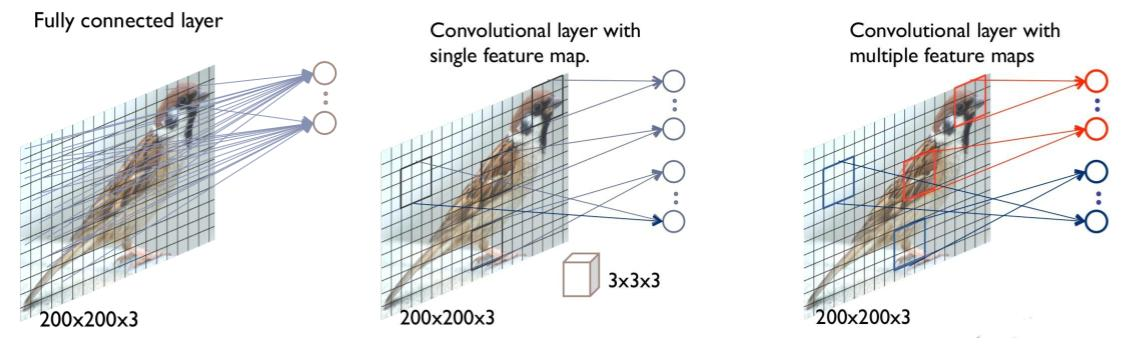

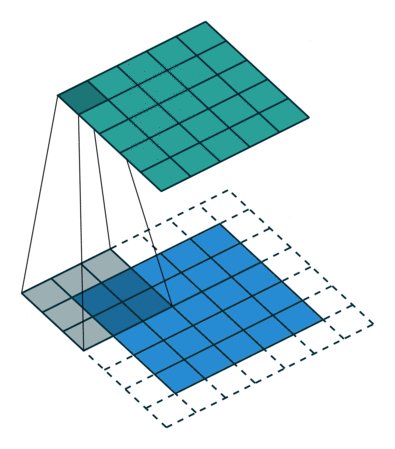

In [ ]:
class Net(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net, self).__init__()

        #calling conv2d module for convolution
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5,stride=1,padding=0,bias=True)

        #calling MaxPool2d module for max pooling with downsampling of 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, 5)

        #fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    #defining the structure of the network
    def forward(self, x):

        #Applying relu activation after each conv layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

#Printing the network architecture
print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
#Printing the parameter values
params = list(net.parameters())
print(params[0].size())  # conv1's .weight

torch.Size([6, 3, 5, 5])


In [ ]:
####train data
#Compose transforms (applies data transformation and augmentation) prior to feeding to training
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#inbuilt dataset class for reading CIFAR10 dataset
trainset = torchvision.datasets.CIFAR10(root='../../data/lab1', train=True,
                                        download=True, transform=transform)

#dataloader for Batching, shuffling and loading data in parallel
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

####test data
testset = torchvision.datasets.CIFAR10(root='../../data/lab1', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 37793559.67it/s]


Extracting ../../data/lab1/cifar-10-python.tar.gz to ../../data/lab1


Visualizing the dataset images

GroundTruth:    cat  ship  ship plane


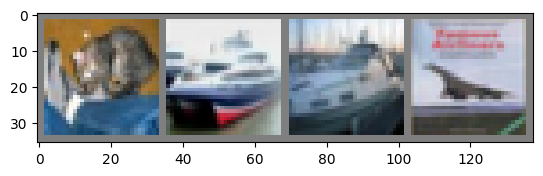

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Loss Function
In this example, we will use Classification Cross-Entropy loss.<br>
Cross Entropy loss is given as:- $L=-\sum_i y_i \log(p_i)$ and $p_i=\frac{\exp^{x_i}}{\sum_k \exp^{x_k}}$

There are many other loss functions such as MSELoss, L1Loss etc. Visit [here](http://pytorch.org/docs/master/nn.html#loss-functions) for other loss functions.

We use the SGD optimizer to train the network. There are many other optimizers like Adagrad, Adadelta, RMSProp and many more. Visit [here](http://pytorch.org/docs/master/optim.html) for other examples.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training

[1,  2000] loss: 2.206
[1,  4000] loss: 1.838
[1,  6000] loss: 1.677
[1,  8000] loss: 1.588
[1, 10000] loss: 1.515
[1, 12000] loss: 1.479


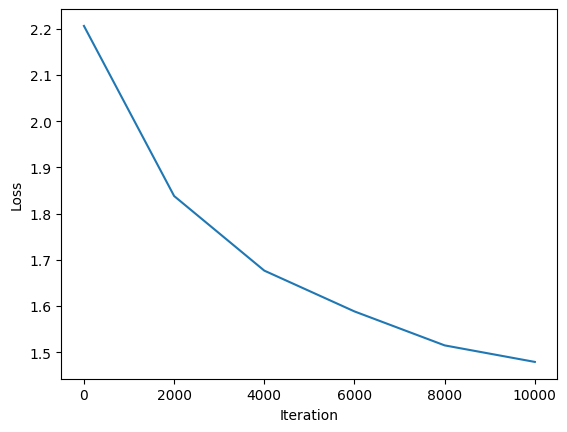

Finished Training


In [ ]:
plotIter = 2000
plotIterCntr = 0
numEpochs = 1
trainLoss = np.zeros((plotIter*numEpochs,1))
trainIter = np.arange(plotIter*numEpochs)

#Transferring the model to GPU
net.cuda()

for epoch in range(numEpochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data.item()
        if i % plotIter == plotIter-1:    # print every plotIter mini-batches
            trainLoss[plotIterCntr] = running_loss / plotIter
            plotIterCntr+=1

            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / plotIter))
            running_loss = 0.0

#Plotting the training graph
plt.plot(np.arange(plotIterCntr)*plotIter,trainLoss[0:plotIterCntr], label="train")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

print('Finished Training')

In [ ]:
outputs = net(Variable(images).cuda())
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j].item()]
                              for j in range(4)))

Predicted:   bird   car   car plane


In [ ]:
## Prediction of accuracy
correct = 0
total = 0

#Iterating over the batches returned from testloader
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    labels = labels.cuda()
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 48 %


## Exercise
- Visualize the conv1 layer weights as directed below
- Reinitialize the network and train it for 5 epochs and test its accuracy. Visualize the conv1 layer weights. Do you see any difference?
- Manipulate the learning rates in range of 10-0.0001 and understand how the training proceeds.
- Check the performance by changing:-
    - Add two more conv layers and check the training performance and test accuracy.
    - Modify the loss function to MSELoss.

### Visualization of Layers
To undestand what is being learnt in the filters, we now visualize the weights. Here we restrict ourselves to conv1 layer which contains 3d filters and can be visualized in the image space itself.

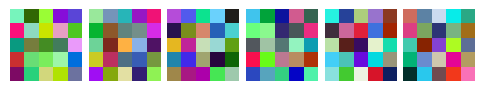

In [ ]:
#### Visualization of Layer 1 weights
def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i])
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

net_cpu = net.cpu()

#Reading the conv1 weights
dat = net_cpu.conv1.weight.data.numpy()

#Normalizing the weights from (0,1)
maxVal = dat.max()
minVal = abs(dat.min())
maxVal = max(maxVal,minVal)
dat = dat / maxVal
dat = dat / 2
dat = dat + 0.5

#calling visualization function
plot_kernels(dat.transpose((0,2,3,1)))

### Reinitialize the network and train it for 5 epochs and test its accuracy. Visualize the conv1 layer weights.

In [ ]:
net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:

plotIter = 2000
plotIterCntr = 0
numEpochs = 5
trainLoss = np.zeros((plotIter*numEpochs,1))
trainIter = np.arange(plotIter*numEpochs)

#Transferring the model to GPU
net.cuda()

for epoch in range(numEpochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data.item()
        if i % plotIter == plotIter-1:    # print every plotIter mini-batches
            trainLoss[plotIterCntr] = running_loss / plotIter
            plotIterCntr+=1

            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / plotIter))
            running_loss = 0.0

# #Plotting the training graph
# plt.plot(np.arange(plotIterCntr)*plotIter,trainLoss[0:plotIterCntr], label="train")
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()

print('Finished Training')

[1,  2000] loss: 2.156
[1,  4000] loss: 1.832
[1,  6000] loss: 1.688
[1,  8000] loss: 1.594
[1, 10000] loss: 1.518
[1, 12000] loss: 1.467
[2,  2000] loss: 1.384
[2,  4000] loss: 1.371
[2,  6000] loss: 1.352
[2,  8000] loss: 1.339
[2, 10000] loss: 1.332
[2, 12000] loss: 1.286
[3,  2000] loss: 1.227
[3,  4000] loss: 1.231
[3,  6000] loss: 1.208
[3,  8000] loss: 1.209
[3, 10000] loss: 1.185
[3, 12000] loss: 1.176
[4,  2000] loss: 1.105
[4,  4000] loss: 1.104
[4,  6000] loss: 1.113
[4,  8000] loss: 1.109
[4, 10000] loss: 1.119
[4, 12000] loss: 1.143
[5,  2000] loss: 1.028
[5,  4000] loss: 1.045
[5,  6000] loss: 1.037
[5,  8000] loss: 1.041
[5, 10000] loss: 1.064
[5, 12000] loss: 1.023
Finished Training


In [ ]:
## Prediction of accuracy
correct = 0
total = 0

#Iterating over the batches returned from testloader
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    labels = labels.cuda()
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


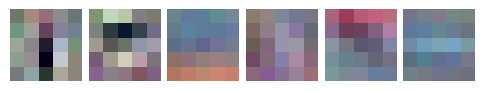

In [ ]:
#Reading the conv1 weights
net_cpu = net.cpu()
dat = net_cpu.conv1.weight.data.numpy()

#Normalizing the weights from (0,1)
maxVal = dat.max()
minVal = abs(dat.min())
maxVal = max(maxVal,minVal)
dat = dat / maxVal
dat = dat / 2
dat = dat + 0.5

#calling visualization function
plot_kernels(dat.transpose((0,2,3,1)))

The visualization of layers got denser due to increase in epochs

### Manipulate the learning rates in range of 10-0.0001 and understand how the training proceeds

In [ ]:
def learning(lrg):
  net = Net()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lrg, momentum=0.9)

  plotIter = 2000
  plotIterCntr = 0
  numEpochs = 1
  trainLoss = np.zeros((plotIter*numEpochs,1))
  trainIter = np.arange(plotIter*numEpochs)

  #Transferring the model to GPU
  net.cuda()

  for epoch in range(numEpochs):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs
          inputs, labels = data

          # wrap them in Variable
          inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.data.item()
          if i % plotIter == plotIter-1:    # print every plotIter mini-batches
              trainLoss[plotIterCntr] = running_loss / plotIter
              plotIterCntr+=1


              running_loss = 0.0

  ## Prediction of accuracy
  correct = 0
  total = 0

  #Iterating over the batches returned from testloader
  for data in testloader:
      images, labels = data
      outputs = net(Variable(images.cuda()))
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      labels = labels.cuda()
      correct += (predicted == labels).sum()

  return correct/total

In [ ]:
dic={}


In [ ]:
dic[10]=learning(10)
dic[1]=learning(1)
dic[0.1]=learning(0.1)
dic[0.01]=learning(0.01)
dic[0.001]=learning(0.001)
dic[0.0001]=learning(0.0001)

In [ ]:
dic

{10: tensor(0.1000, device='cuda:0'),
 1: tensor(0.1000, device='cuda:0'),
 0.1: tensor(0.1000, device='cuda:0'),
 0.01: tensor(0.2777, device='cuda:0'),
 0.001: tensor(0.4756, device='cuda:0'),
 0.0001: tensor(0.2011, device='cuda:0')}

It is evident that with larger learning rates, the descent is more at a time , leading to larger losses. As the learning rate decrease, the accuracy too increase. The above is implemented for only 1 epoch, for larger epochs in the above cases, it will start to overfit.

We also see a reduction in accuracy in 0.0001 lr, this is because the learning rate is too small to make much significant changes in only 1 epoch.

### Add two more conv layers and check the training performance and test accuracy

In [ ]:
class Net_exercise(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net_exercise, self).__init__()

        #calling conv2d module for convolution
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5,stride=1,padding=0,bias=True)

        #calling MaxPool2d module for max pooling with downsampling of 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, 5)

        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 64, 3)


        #fully connected layers
        self.fc1 = nn.Linear(64, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    #defining the structure of the network
    def forward(self, x):

        #Applying relu activation after each conv layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))


        #reshaping to 1d for giving input to fully connected units
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))

        x = x.view(-1, 64)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net_exercise()

#Printing the network architecture
print(net)


Net_exercise(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
plotIter = 2000
plotIterCntr = 0
numEpochs = 5
trainLoss = np.zeros((plotIter*numEpochs,1))
trainIter = np.arange(plotIter*numEpochs)

#Transferring the model to GPU
net.cuda()

for epoch in range(numEpochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data.item()
        if i % plotIter == plotIter-1:    # print every plotIter mini-batches
            trainLoss[plotIterCntr] = running_loss / plotIter
            plotIterCntr+=1

            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / plotIter))
            running_loss = 0.0

# #Plotting the training graph
# plt.plot(np.arange(plotIterCntr)*plotIter,trainLoss[0:plotIterCntr], label="train")
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()

print('Finished Training')

[1,  2000] loss: 2.302
[1,  4000] loss: 2.246
[1,  6000] loss: 1.978
[1,  8000] loss: 1.823
[1, 10000] loss: 1.719
[1, 12000] loss: 1.628
[2,  2000] loss: 1.546
[2,  4000] loss: 1.514
[2,  6000] loss: 1.474
[2,  8000] loss: 1.435
[2, 10000] loss: 1.430
[2, 12000] loss: 1.403
[3,  2000] loss: 1.344
[3,  4000] loss: 1.335
[3,  6000] loss: 1.336
[3,  8000] loss: 1.338
[3, 10000] loss: 1.299
[3, 12000] loss: 1.302
[4,  2000] loss: 1.254
[4,  4000] loss: 1.236
[4,  6000] loss: 1.236
[4,  8000] loss: 1.248
[4, 10000] loss: 1.250
[4, 12000] loss: 1.220
[5,  2000] loss: 1.183
[5,  4000] loss: 1.209
[5,  6000] loss: 1.179
[5,  8000] loss: 1.166
[5, 10000] loss: 1.165
[5, 12000] loss: 1.164
Finished Training


In [ ]:
## Prediction of accuracy
correct = 0
total = 0

#Iterating over the batches returned from testloader
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    labels = labels.cuda()
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 56 %


### Modify the loss function to MSELoss

In [ ]:
class Net_exercise(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net_exercise, self).__init__()

        #calling conv2d module for convolution
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5,stride=1,padding=0,bias=True)

        #calling MaxPool2d module for max pooling with downsampling of 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, 5)

        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 64, 3)


        #fully connected layers
        self.fc1 = nn.Linear(64, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    #defining the structure of the network
    def forward(self, x):

        #Applying relu activation after each conv layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))


        #reshaping to 1d for giving input to fully connected units
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))

        x = x.view(-1, 64)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net_exercise()

#Printing the network architecture
print(net)

Net_exercise(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
plotIter = 2000
plotIterCntr = 0
numEpochs = 1
trainLoss = np.zeros((plotIter*numEpochs,1))
trainIter = np.arange(plotIter*numEpochs)

#Transferring the model to GPU
net.cuda()

for epoch in range(numEpochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        outputs = torch.max(outputs, 1)[1].float().unsqueeze(1).cuda()
        loss = criterion(outputs, labels.view(1, -1)).float()
        loss.requires_grad = True
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data.item()
        if i % plotIter == plotIter-1:    # print every plotIter mini-batches
            trainLoss[plotIterCntr] = running_loss / plotIter
            plotIterCntr+=1

            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / plotIter))
            running_loss = 0.0


print('Finished Training')

[1,  2000] loss: 10.469
[1,  4000] loss: 10.551
[1,  6000] loss: 10.472
[1,  8000] loss: 10.656
[1, 10000] loss: 10.441
[1, 12000] loss: 10.494
Finished Training


In [ ]:
## Prediction of accuracy
correct = 0
total = 0

#Iterating over the batches returned from testloader
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    labels = labels.cuda()
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %
